In [1]:
import pandas as pd
from pandas import read_excel
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('dsw_dataset.xlsx')
df

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,106.816666,-6.2,6897.8
7039,7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,106.816666,-6.2,2782.0
7040,7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,106.816666,-6.2,7228.0
7041,7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,106.816666,-6.2,3630.9


In [3]:
df.shape


(7043, 16)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Customer ID                   7043 non-null   int64  
 1   Tenure Months                 7043 non-null   int64  
 2   Location                      7043 non-null   object 
 3   Device Class                  7043 non-null   object 
 4   Games Product                 7043 non-null   object 
 5   Music Product                 7043 non-null   object 
 6   Education Product             7043 non-null   object 
 7   Call Center                   7043 non-null   object 
 8   Video Product                 7043 non-null   object 
 9   Use MyApp                     7043 non-null   object 
 10  Payment Method                7043 non-null   object 
 11  Monthly Purchase (Thou. IDR)  7043 non-null   float64
 12  Churn Label                   7043 non-null   object 
 13  Lon

In [44]:
def report(df):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    
    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique()[:5])
        n_uniques.append(df[i].nunique())
    
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})

In [45]:
report(df)


,Column,d_type,unique_sample,n_uniques
0,Customer ID,float64,"[0.0, 0.00014200511218403862, 0.00028401022436...",7043
1,Tenure Months,float64,"[0.027777777777777776, 0.1111111111111111, 0.3...",73
2,Location,float64,"[1.0, 0.0]",2
3,Device Class,float64,"[1.0, 0.0, 0.5]",3
4,Games Product,float64,"[1.0, 0.0, 0.5]",3
5,Music Product,float64,"[1.0, 0.0, 0.5]",3
6,Education Product,float64,"[0.0, 1.0, 0.5]",3
7,Call Center,float64,"[0.0, 1.0]",2
8,Video Product,float64,"[0.0, 1.0, 0.5]",3
9,Use MyApp,float64,"[0.0, 1.0, 0.5]",3


In [5]:
df.columns

Index(['Customer ID', 'Tenure Months', 'Location', 'Device Class',
       'Games Product', 'Music Product', 'Education Product', 'Call Center',
       'Video Product', 'Use MyApp', 'Payment Method',
       'Monthly Purchase (Thou. IDR)', 'Churn Label', 'Longitude', 'Latitude',
       'CLTV (Predicted Thou. IDR)'],
      dtype='object')

In [6]:
df.describe()

,Customer ID,Tenure Months,Monthly Purchase (Thou. IDR),Longitude,Latitude,CLTV (Predicted Thou. IDR)
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,32.371149,84.190200,107.043246,-6.404184,5720.384481
std,2033.283305,24.559481,39.117061,0.358316,0.322898,1537.974298
min,0.000000,0.000000,23.725000,106.816666,-6.914744,2603.900000
25%,1760.500000,9.000000,46.150000,106.816666,-6.914744,4509.700000
50%,3521.000000,29.000000,91.455000,106.816666,-6.200000,5885.100000
75%,5281.500000,55.000000,116.805000,107.609810,-6.200000,6994.650000
max,7042.000000,72.000000,154.375000,107.609810,-6.200000,8450.000000


In [7]:
df.isna().sum()

Customer ID                     0
Tenure Months                   0
Location                        0
Device Class                    0
Games Product                   0
Music Product                   0
Education Product               0
Call Center                     0
Video Product                   0
Use MyApp                       0
Payment Method                  0
Monthly Purchase (Thou. IDR)    0
Churn Label                     0
Longitude                       0
Latitude                        0
CLTV (Predicted Thou. IDR)      0
dtype: int64

In [8]:
df.duplicated().sum()

0

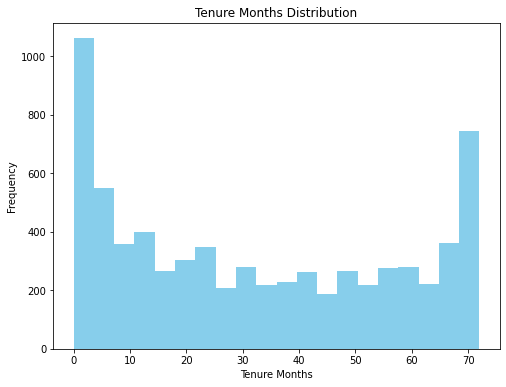

In [9]:

plt.figure(figsize=(8, 6))
plt.hist(df['Tenure Months'], bins=20, color='skyblue')
plt.title('Tenure Months Distribution')
plt.xlabel('Tenure Months')
plt.ylabel('Frequency')
plt.show()


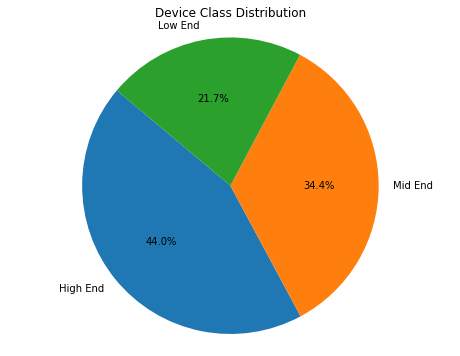

In [10]:
device_counts = df['Device Class'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Device Class Distribution')
plt.show()


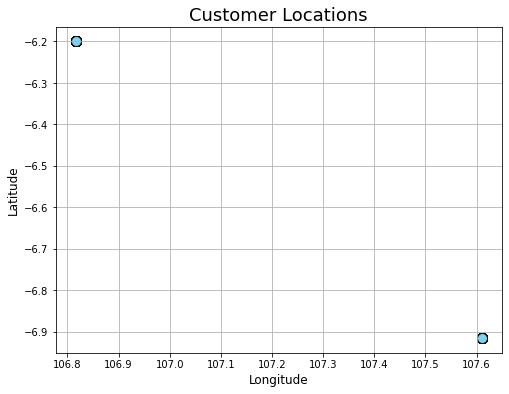

In [11]:

plt.figure(figsize=(8, 6))

# Menyesuaikan warna, ukuran, dan transparansi marker
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.7, s=100, c='skyblue', edgecolors='k')

# Menambahkan label axis dan judul
plt.title('Customer Locations', fontsize=18)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Menyesuaikan grid (opsional)
plt.grid(True)

plt.show()

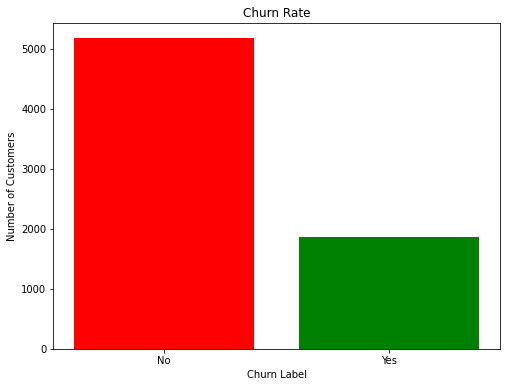

In [12]:
churn_counts = df['Churn Label'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(churn_counts.index, churn_counts.values, color=['red', 'green'])
plt.title('Churn Rate')
plt.xlabel('Churn Label')
plt.ylabel('Number of Customers')
plt.show()

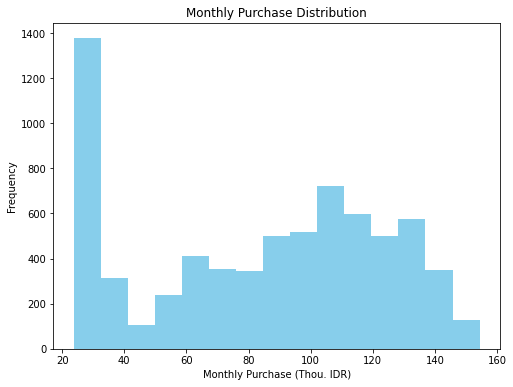

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(df['Monthly Purchase (Thou. IDR)'], bins=15, color='skyblue')
plt.title('Monthly Purchase Distribution')
plt.xlabel('Monthly Purchase (Thou. IDR)')
plt.ylabel('Frequency')
plt.show()

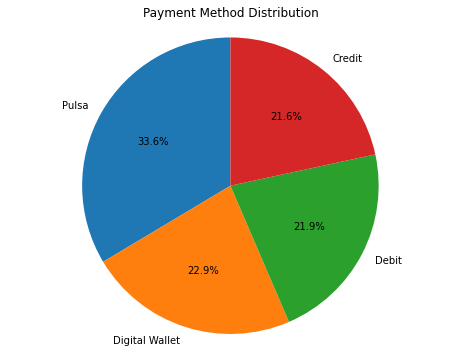

In [14]:
payment_method_counts = df['Payment Method'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Payment Method Distribution')
plt.show()

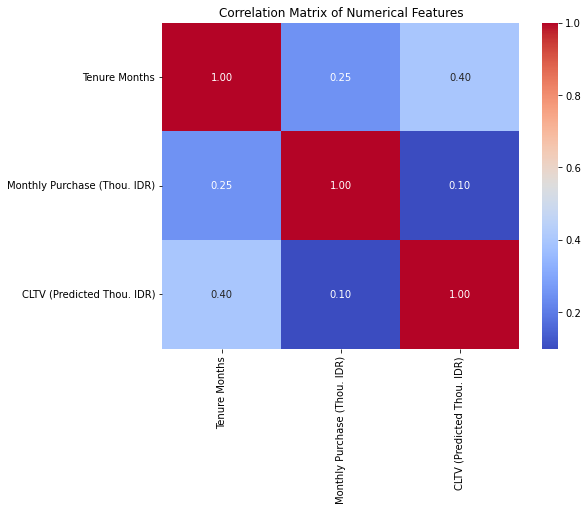

In [15]:
numeric_columns = ['Tenure Months', 'Monthly Purchase (Thou. IDR)', 'CLTV (Predicted Thou. IDR)']
numeric_data = df[numeric_columns]

correlation_matrix = numeric_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

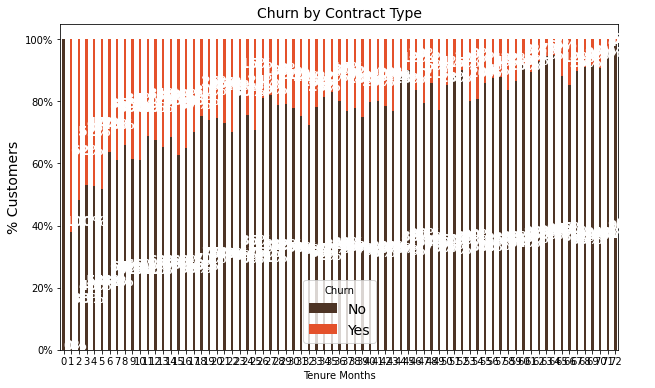

In [16]:
colors = ['#4D3425','#E4512B']
contract_churn = df.groupby(['Tenure Months','Churn Label']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Contract Type',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

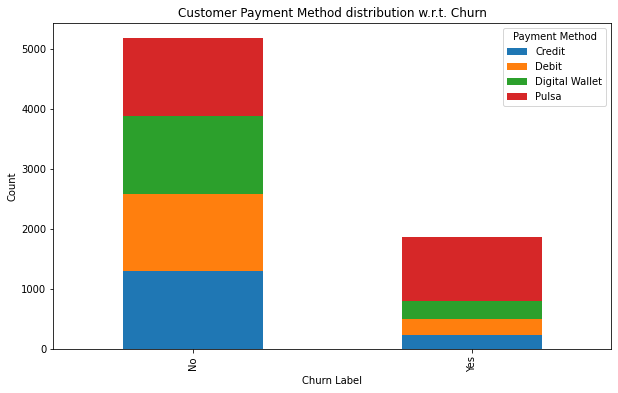

In [17]:
# Grouping data for plotting
grouped = df.groupby(['Churn Label', 'Payment Method']).size().unstack()

# Plotting the grouped data
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Churn Label')
plt.ylabel('Count')
plt.title('Customer Payment Method distribution w.r.t. Churn')
plt.legend(title='Payment Method')
plt.show()

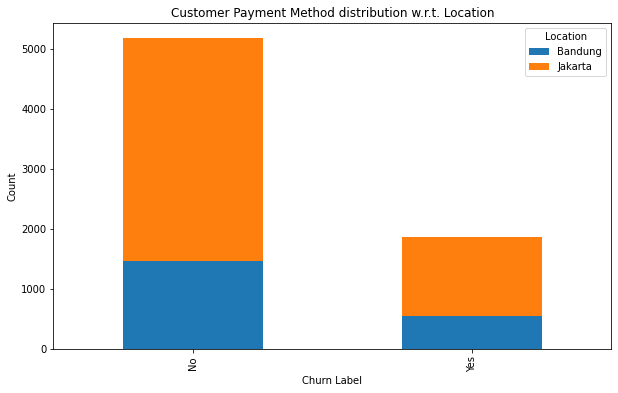

In [18]:
# Grouping data for plotting
grouped = df.groupby(['Churn Label', 'Location']).size().unstack()

# Plotting the grouped data
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Churn Label')
plt.ylabel('Count')
plt.title('Customer Payment Method distribution w.r.t. Location')
plt.legend(title='Location')
plt.show()

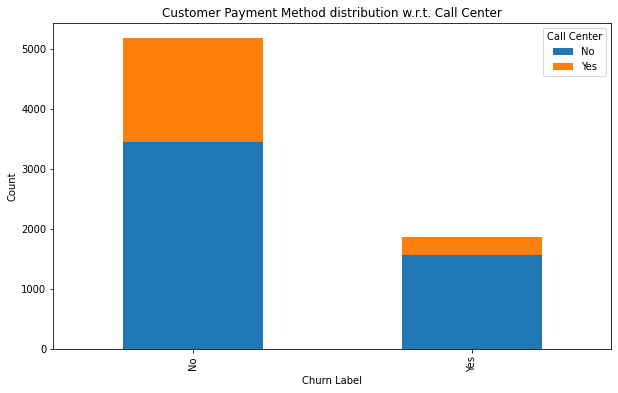

In [19]:
# Grouping data for plotting
grouped = df.groupby(['Churn Label', 'Call Center']).size().unstack()

# Plotting the grouped data
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Churn Label')
plt.ylabel('Count')
plt.title('Customer Payment Method distribution w.r.t. Call Center')
plt.legend(title='Call Center')
plt.show()

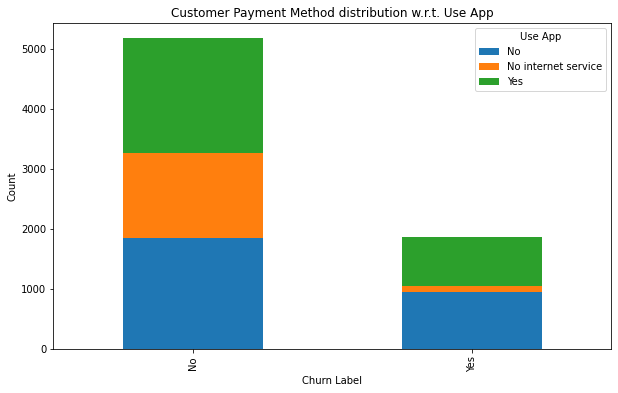

In [20]:
# Grouping data for plotting
grouped = df.groupby(['Churn Label', 'Use MyApp']).size().unstack()

# Plotting the grouped data
grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Churn Label')
plt.ylabel('Count')
plt.title('Customer Payment Method distribution w.r.t. Use App')
plt.legend(title='Use App')
plt.show()

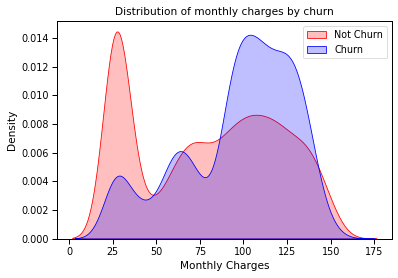

In [21]:
sns.set_context("paper", font_scale=1.1)
ax = sns.kdeplot(df['Monthly Purchase (Thou. IDR)'][df["Churn Label"] == 'No'], color="Red", fill=True)
ax = sns.kdeplot(df['Monthly Purchase (Thou. IDR)'][df["Churn Label"] == 'Yes'], ax=ax, color="Blue", fill=True)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')
plt.show()

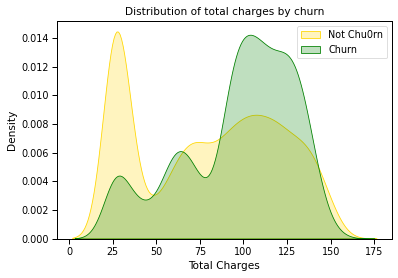

In [22]:
ax = sns.kdeplot(df['Monthly Purchase (Thou. IDR)'][(df["Churn Label"] == 'No') ],
                color="Gold", fill=True);
ax = sns.kdeplot(df['Monthly Purchase (Thou. IDR)'][(df["Churn Label"] == 'Yes') ],
                ax =ax, color="Green", fill=True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

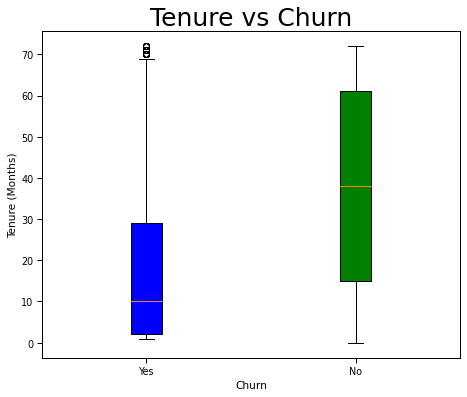

In [23]:

# Membuat boxplot dengan penambahan warna menggunakan Matplotlib
plt.figure(figsize=(7.5, 6))
churn_labels = df['Churn Label'].unique()
data = [df[df['Churn Label'] == label]['Tenure Months'] for label in churn_labels]

box = plt.boxplot(data, labels=churn_labels, patch_artist=True)

colors = ['blue', 'green']  # Warna untuk setiap boxplot
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.title('Tenure vs Churn', fontdict={'size': 25})
plt.show()

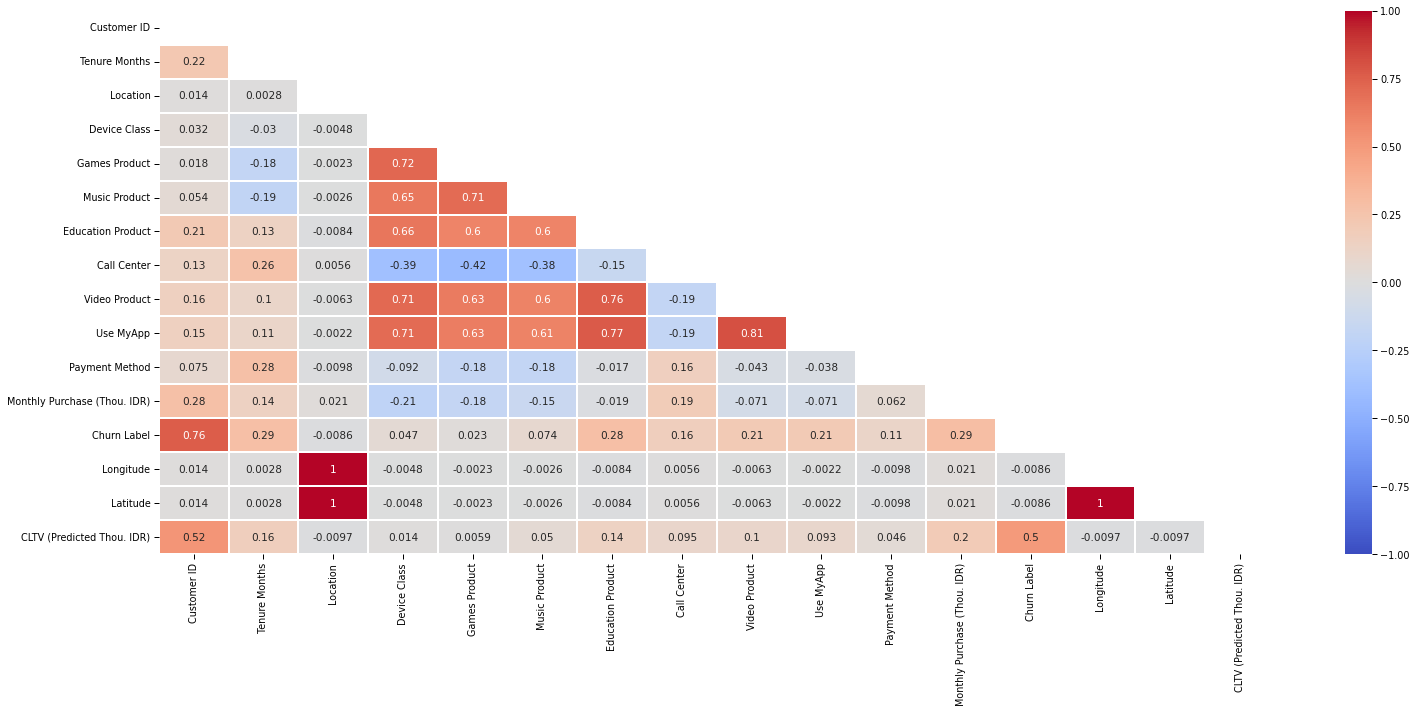

In [24]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [25]:
def multivariate_analysis(cat_var_1, cat_var_2, cat_var_3, target_variable=df['Churn Label']):
    
    fig,ax = plt.subplots(1,1,figsize = (18,10))
    font_size = 15
    cat_grouped_by_cat_target = pd.crosstab(index = [cat_var_1, cat_var_2, cat_var_3],
                                        columns = target_variable, normalize = "index")*100                            
    cat_grouped_by_cat_target.rename({"Yes":"% Churn", "No":"% Not Churn"}, axis = 1, inplace = True)
    cat_grouped_by_cat_target.plot.bar(color = ["green", "red"],ax=ax)
    ax.set_xlabel(f"{cat_var_1.name}, {cat_var_2.name}, {cat_var_3.name}", fontsize = font_size)
    ax.set_ylabel("Relative Frequency(%)", fontsize = font_size)
    ax.tick_params(axis="x", labelsize=font_size)
    ax.tick_params(axis="y", labelsize=font_size)
    plt.legend(loc = "best")
    return plt.show()

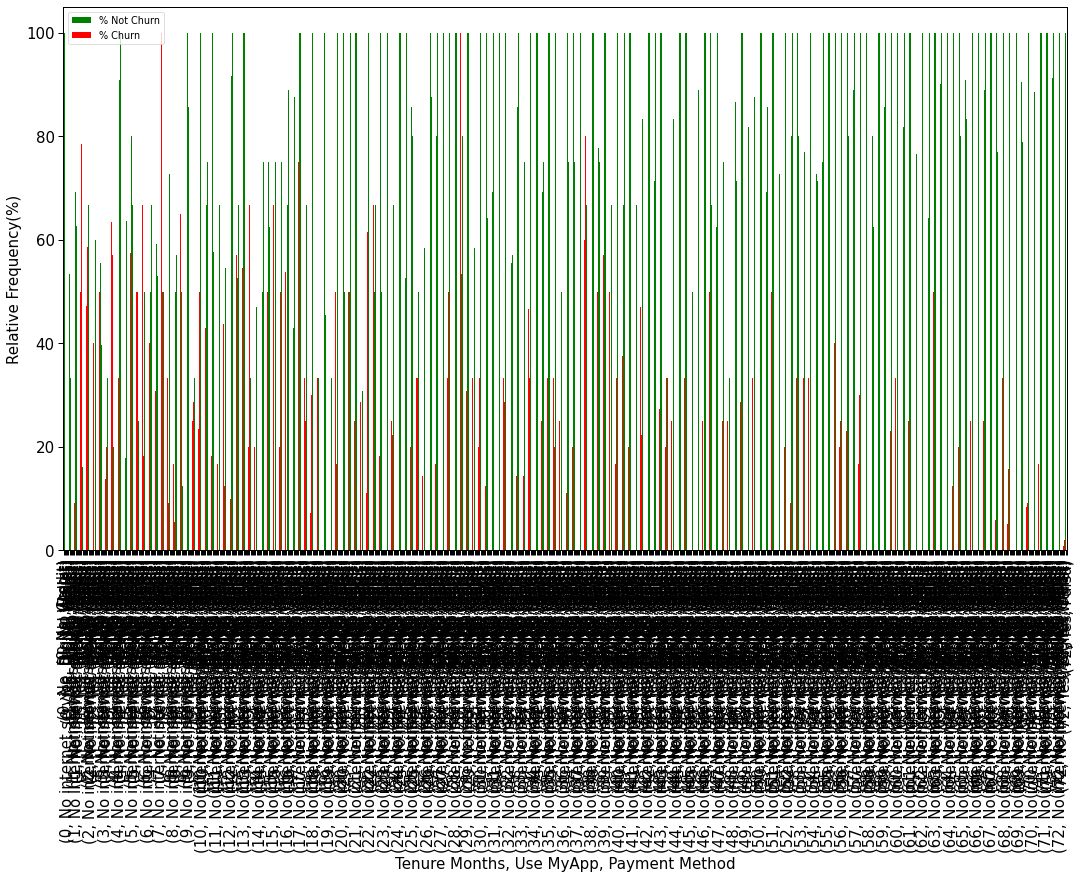

In [26]:
multivariate_analysis(df['Tenure Months'], df['Use MyApp'], df['Payment Method'])

Preprocessing Data

In [27]:
df = df.apply(LabelEncoder().fit_transform)
df

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,1,2,2,2,0,0,0,0,2,436,1,0,1,867
1,1,2,1,0,0,0,0,0,0,0,3,729,1,0,1,486
2,2,8,1,0,0,0,2,0,2,2,3,1274,1,0,1,2587
3,3,28,1,0,0,0,2,1,2,2,3,1371,1,0,1,2260
4,4,49,1,0,0,2,2,0,2,2,1,1349,1,0,1,2556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,72,1,1,1,1,1,0,1,1,1,52,0,0,1,2528
7039,7039,24,1,2,2,0,2,1,2,2,2,991,0,0,1,101
7040,7040,72,1,0,0,2,2,0,2,2,0,1340,0,0,1,2756
7041,7041,11,1,2,2,0,0,0,0,0,3,137,0,0,1,550


In [28]:
scaler = MinMaxScaler(feature_range=(0,1))
scale = scaler.fit_transform(df)
df = pd.DataFrame(scale, columns=df.columns)
df

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0.000000,0.027778,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.666667,0.275253,1.0,0.0,1.0,0.252255
1,0.000142,0.027778,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.460227,1.0,0.0,1.0,0.141402
2,0.000284,0.111111,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.000000,0.804293,1.0,0.0,1.0,0.752691
3,0.000426,0.388889,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.000000,0.865530,1.0,0.0,1.0,0.657550
4,0.000568,0.680556,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.333333,0.851641,1.0,0.0,1.0,0.743672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.999432,1.000000,1.0,0.5,0.5,0.5,0.5,0.0,0.5,0.5,0.333333,0.032828,0.0,0.0,1.0,0.735525
7039,0.999574,0.333333,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.666667,0.625631,0.0,0.0,1.0,0.029386
7040,0.999716,1.000000,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.000000,0.845960,0.0,0.0,1.0,0.801862
7041,0.999858,0.152778,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.086490,0.0,0.0,1.0,0.160023


In [29]:
X=df.drop('Churn Label',axis=1)
y=df['Churn Label']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,089
Trainable params: 1,089
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
177/177 [==============================] - 3s 9ms/step - loss: 0.4915 - accuracy: 0.7311 - val_loss: 0.3529 - val_accuracy: 0.8588
Epoch 2/100
177/177 [==============================] - 1s 4ms/step - loss: 0.2656 - accuracy: 0.9098 - val_loss: 0.2207 - val_accuracy: 0.9219
Epoch 3/100
177/177 [==============================] - 1s 4ms/step - loss: 0.1699 - accuracy: 0.9498 - val_loss: 0.1508 - val_accuracy: 0.9610
Epoch 4/100
177/177 [==============================] - 1s 4ms/step - loss: 0.1252 - accuracy: 0.9624 - val_loss: 0.1213 - val_accuracy: 0.9659
Epoch 5/100
177/177 [==============================] - 1s 4ms/step - loss: 0.1012 - accuracy: 0.9718 - val_loss: 0.0977 - val_accuracy: 0.9752
Epoch 6/100
177/177 [==============================] - 1s 4ms/step - loss: 0.0853 - accuracy: 0.9778 - val_loss: 0.0835 - val_accuracy: 0.9801
Epoch 7/100
177/177 [==============================] - 1s 4ms/step - loss: 0.0747 - accuracy: 0.9799 - val_loss: 0.0742 - val_accuracy: 0.9808

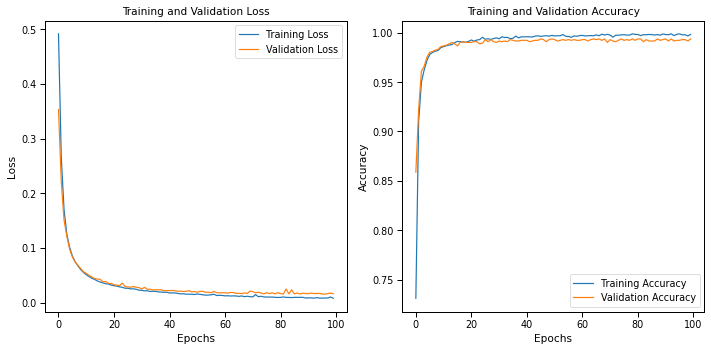

In [34]:

# Dapatkan data loss dan akurasi dari 'history'
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Akurasi
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [35]:
loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Set - Loss: {loss:.4f}")
print(f"Test Set - Accuracy: {accuracy:.4f}")


45/45 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9936
Test Set - Loss: 0.0163
Test Set - Accuracy: 0.9936


In [36]:
from sklearn.metrics import classification_report

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)
# Jika output model menggunakan aktivasi sigmoid, kita perlu mengonversi nilai probabilitas menjadi kelas
y_pred_classes = (y_pred > 0.5).astype(int)

# Membuat classification report
print(classification_report(y_test, y_pred_classes))


45/45 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1009
         1.0       0.99      0.99      0.99       400

    accuracy                           0.99      1409
   macro avg       0.99      0.99      0.99      1409
weighted avg       0.99      0.99      0.99      1409



Random Forest Model

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [38]:
modelR = RandomForestClassifier(n_estimators=100,random_state=42)

In [39]:
modelR.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
y_predR = modelR.predict(X_test)

In [41]:
# Evaluasi model dengan menghitung akurasi atau menggunakan metrik evaluasi
accuracy = accuracy_score(y_test, y_predR.round())
print("Akurasi: {:.2f}%".format(accuracy * 100))


Akurasi: 99.86%


In [42]:
classification_report_result = classification_report(y_test, y_predR.round())
print(classification_report_result)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1009
         1.0       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



In [43]:
predicted_labels = []
actual_labels = []

label_mapping = {0: 'False', 1: 'True',}

for value in y_predR.round():
    predicted_labels.append(label_mapping[value])

for value in y_test:
    actual_labels.append(label_mapping[value])

results = pd.DataFrame({'True Label': actual_labels, 'Predicted Label': predicted_labels})
results


,True Label,Predicted Label
0,True,True
1,False,False
2,False,False
3,True,True
4,True,True
...,...,...
1404,False,False
1405,True,True
1406,False,False
1407,False,False
